# IDEA: Subscribers spend more time biking per day than non-subscribers

## Null Hypothesis: The time of subscribers biking are less than or equal to the time of non-subscribers spent on biking
### _$H_0$_:  $S_{\mathrm{t}}<= NS_{\mathrm{t}}$
### _$H_1$_ : $S_{\mathrm{t}}> NS_{\mathrm{t}}$
### significance level  $\alpha=0.05$

In [207]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

Populating the interactive namespace from numpy and matplotlib


In [208]:
import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/_matplotlibrc.json") )
#pl.rcParams.update(s)

In [209]:
os.getenv('PUIDATA')

'/nfshome/pl1840/PUIdata'

In [210]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [211]:
datestring = '201801'
getCitiBikeCSV(datestring)

file in place, you can continue


In [212]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992,1,2018-01-01 02:06:17.541
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969,2,2018-01-01 12:06:18.039
2,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946,1,2018-01-01 12:06:56.978
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994,1,2018-01-01 14:53:10.186
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991,1,2018-01-01 17:34:30.192


In [213]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [214]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid','birth year', 'gender','tripduration'],
       axis=1, inplace=True)

In [215]:
df.head()

,usertype,date
0,Subscriber,2018-01-01 02:06:17.541
1,Subscriber,2018-01-01 12:06:18.039
2,Subscriber,2018-01-01 12:06:56.978
3,Subscriber,2018-01-01 14:53:10.186
4,Subscriber,2018-01-01 17:34:30.192


In [216]:
df.usertype.unique()

array(['Subscriber', 'Customer'], dtype=object)

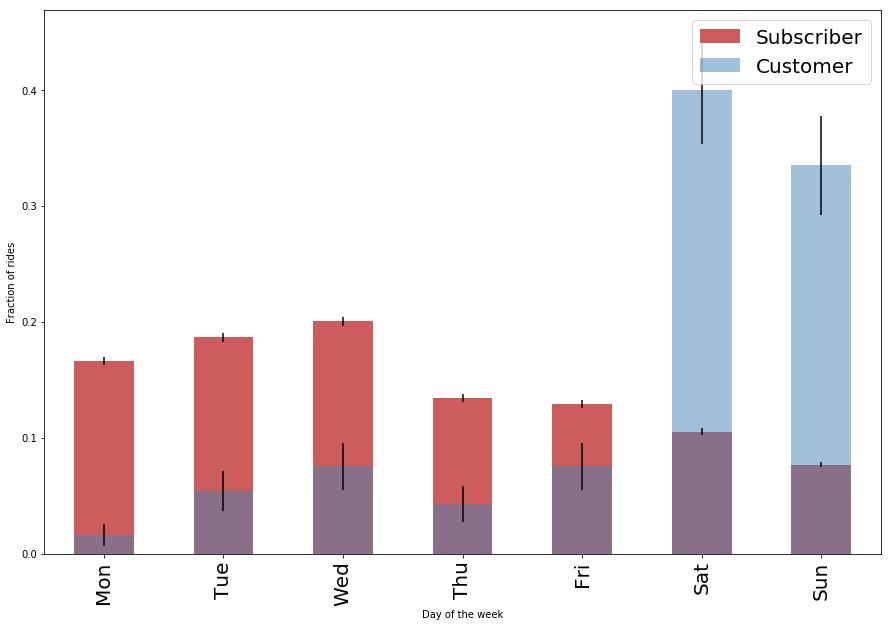

In [222]:
fig = pl.figure(figsize(15,10))
subs = df.date[df.usertype == 'Subscriber'].groupby([df.date.dt.weekday]).count()
subs_sum = subs.sum()
error_s = np.sqrt(subs)
((subs) / subs_sum).plot(kind="bar", color='IndianRed', yerr=[((error_s) / subs_sum, (error_s) / subs_sum)],label='Subscriber')

cust = df.date[df.usertype == 'Customer'].groupby([df.date.dt.weekday]).count()
cust_sum = cust.sum()
error_c=np.sqrt(cust)
ax = ((cust) / cust_sum).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_c) / cust_sum, (error_c) / cust_sum)], 
                                color='SteelBlue', label='Customer')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['Subscriber','Customer'],fontsize=20)

